In [200]:
# -*- coding: utf-8 -*-
'''
Created on Sat Jun 12 02:33:19 2021

@author: 18120254: preprocess data, draw plot 1, 2 & write stories.
'''

'\nCreated on Sat Jun 12 02:33:19 2021\n\n@author: 18120254: preprocess data, draw plot 1, 2 & write stories.\n'

In [201]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Data preprocessing

In [202]:
# read raw data
raw_data = pd.read_csv('household_power_consumption.txt', sep=';', names=['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], header=None, skiprows=1)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [203]:
# clean data
def dataframeCleaner(data):
    # delete wrong rows
    data = data[data["Date"].str.contains("Date")==False] 

    # combine Date & Time columns
    data['Date_time'] = data['Date'] + ' ' + data['Time']
    data.Date = pd.to_datetime(data['Date'])

    # filter the dates
    mask = (data['Date'] >= '2007-02-01') & (data['Date'] <= '2007-02-02')
    data = data.loc[mask]

    data['Date_time'] = pd.to_datetime(data['Date_time']) # change type to datetime
    # delete Date & Time columns
    data = data.drop("Date", axis=1)
    data = data.drop("Time", axis=1)


    for columnname in data: 
        temp = []
        if columnname != 'Date_time':
            for column in data[columnname]:   
                column = str(column)
                column = column.replace('?','0')
                try:   # using try except block to convert datatype string to float while avoiding error
                    column = float(column)
                except:
                    pass
                temp.append(column)
            data[columnname] = temp

    data = data.replace(r'^\s*$', 0, regex=True) 
    return data

In [204]:
data = dataframeCleaner(raw_data)
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date_time
23436,0.442,0.122,241.06,1.8,0.0,0.0,0.0,2007-02-01 00:00:00
23437,0.370,0.000,241.22,1.6,0.0,0.0,0.0,2007-02-01 00:01:00
23438,0.368,0.000,241.03,1.6,0.0,0.0,0.0,2007-02-01 00:02:00
23439,0.370,0.000,241.41,1.6,0.0,0.0,0.0,2007-02-01 00:03:00
23440,0.370,0.000,241.22,1.6,0.0,0.0,0.0,2007-02-01 00:04:00


In [205]:
data.dtypes 

Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Date_time                datetime64[ns]
dtype: object

## Visualization

In [206]:
def plot1(data):
    # create a canvas with width 10, height 7.5 
    fig_obj = plt.figure(figsize=(10, 7.5))
    # remove the plot frame lines
    ax = plt.subplot(111)
    ax.spines["bottom"].set_visible(True)  
    ax.spines["left"].set_visible(True)    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    # plot the histogram
    p = plt.hist(data, bins = 15,color='red')
    plt.xlabel('Global Active Power (kilowatts)')
    plt.ylabel('Frequency')
    plt.title('Global Active Power',fontsize=14,fontweight='bold')

    # save figure
    plt.tight_layout()
    plt.savefig('plot1.png', bbox_inches='tight')

    plt.show()

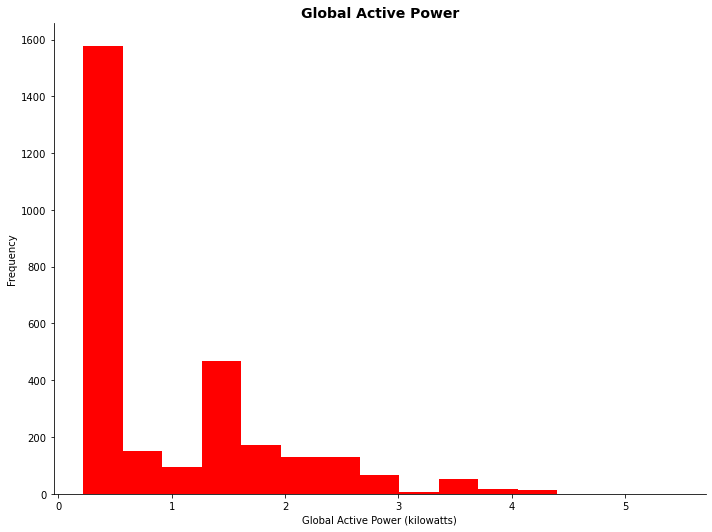

In [207]:
plot1(data['Global_active_power'])

### Câu chuyện:

Biểu đồ trên sử dụng loại biểu đồ phân bố tần số (Histograms), dùng để đo lường tần số xuất hiện của một vấn đề nào đó. Qua đó, cho ta thấy rõ sự thay đổi cũng như biến động của tập dữ liệu.

Trong biểu đồ trên, ta có thể thấy:
- Trục hoành mang đơn vị đo của *Công suất hoạt động Trung bình theo phút Toàn cầu của Hộ gia đình* (tính theo kW). 
- Trục tung mang đơn vị đo *Tần số* (hay số lần xuất hiện của dòng dữ liệu trong tệp dữ liệu).
- Chiều cao của cột thể hiện chi tiết tần số tương ứng với mỗi kW điện sử dụng.

Có thể thấy biểu đồ thuộc dạng phân bố lệch trái, có 2 đỉnh phân bố độc lập. Lượng điện tiêu thụ nhiều nhất là tầm 4,3 kW. 

Trung bình lượng điện tiêu thụ trong khoảng thời gian khảo sát nằm trong khoảng gần 0,4 kW. 

Ở đỉnh nhỏ thì có gần 500 mốc thời gian là xài lượng điện khoảng 1,4 kW. Giá trị ở đỉnh nhỏ cũng có thể là giá trị bất thường của bộ dữ liệu.


In [208]:
def plot2(data):
    fig_obj = plt.figure(figsize=(10, 7.5))

    plt.plot(data['Date_time'], data['Global_active_power'], color='black')

    plt.xlabel('Hours over a 2-day period (02-01 and 02-02)')
    plt.ylabel('Global Active Power (kilowatts)')
    # save figure
    plt.tight_layout()
    plt.savefig('plot2.png', bbox_inches='tight')

    plt.show()

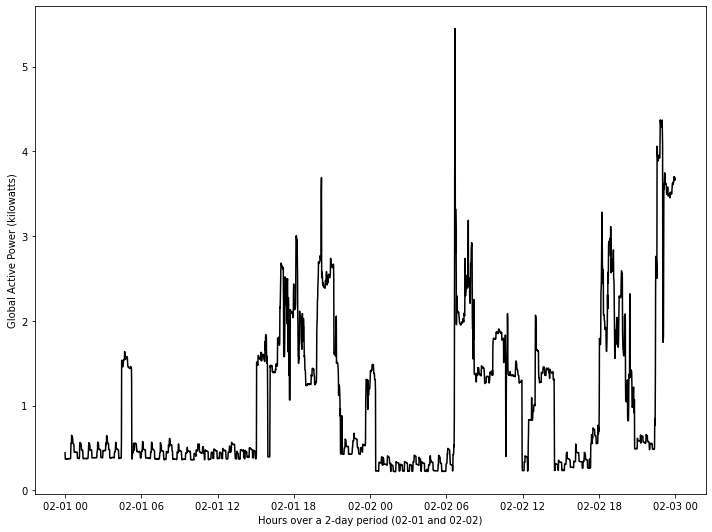

In [209]:
plot2(data)

### Câu chuyện: 

Biểu đồ trên sử dụng loại biểu đồ đường, dùng để vẽ sự thay đổi của các đại lượng khi mà đơn vị thời gian nhiều và tương đối liên tục. Từ đó ta có thể thấy tốc độ tăng trưởng của đơn vị đại lượng đó.

Trong biểu đồ trên, ta có thể thấy:
- Trục hoành mang đơn vị đo *Thời gian trong khoảng giai đoạn 2 ngày* (từ ngày 01/02/2007 đến 02/02/2007, tính theo giờ). 
- Trục tung mang đơn vị đo của *Công suất hoạt động Trung bình theo phút Toàn cầu của Hộ gia đình* (tính theo kW). 
- Đường biểu diễn sự liên tục của năng lượng điện hoạt động trên toàn theo từng giờ.

Hầu hết lượng điện tiêu thụ trung bình trong khoảng 0,4 kW. Vào một số khoảng thời gian gần cuối ngày thì lượng điện tăng vọt lên 2-3 kW. 

Lượng điện sử dụng cao nhất ghi nhận là vào khoảng 6 giờ ngày 2/2. Sau đó lượng điện biến động giảm dần ở mức 3 kW, vào đến vào cuối ngày thì lại tăng vọt lên mức 4 kW. Có thể thấy lượng điện vào ngày 2/2 có xu hướng biến động hơn là vào ngày 1/2.

## References:

https://nymph332088.github.io/CIS4340/labassignments/Lab3/demo_visualization.py

https://anhkiet1189.blogspot.com/2013/09/bieu-o-phan-bo-tan-so-histograms.html
